In [1]:
# Setting up local details:
import os
import sys
import gzip
import glob
import json
from typing import List

import numpy as np
from tqdm import tqdm

# This should be the location of the checkout of the FS-Mol repository:
FS_MOL_CHECKOUT_PATH = os.path.join("/data/local/apps/", "Meta-Learning", "FS-Mol")
FS_MOL_DATASET_PATH = os.path.join("/data/local/apps/", "Meta-Learning", "FS-Mol", "datasets")

os.chdir(FS_MOL_CHECKOUT_PATH)
sys.path.insert(0, FS_MOL_CHECKOUT_PATH)

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '14'

In [3]:
meta_train_tasks = glob.glob(os.path.join(FS_MOL_DATASET_PATH, "train", "*.jsonl.gz"))
meta_test_tasks = glob.glob(os.path.join(FS_MOL_DATASET_PATH, "test", "*.jsonl.gz"))

In [4]:
data_test = []
for task in tqdm(meta_test_tasks):
    with gzip.open(task, "r") as jf:
        x = [json.loads(line) for line in jf]
    data_test.append(x)

data_train = []
for task in tqdm(meta_train_tasks[:100]):
    with gzip.open(task, "r") as jf:
        x = [json.loads(line) for line in jf]
    data_train.append(x)

# The data is a list of test tasks, each of which is a list of molecules in one task
print(len(data_test))
print(len(data_train))

100%|██████████| 100/100 [00:02<00:00, 38.41it/s]

157
100


In [5]:
# Each task is list of molecules which itself is a dictionary
# data[0] is the first task which is a list of molecules/dictionaries
test_task_size = [len(task) for task in data_test]
train_task_size = [len(task) for task in data_train]

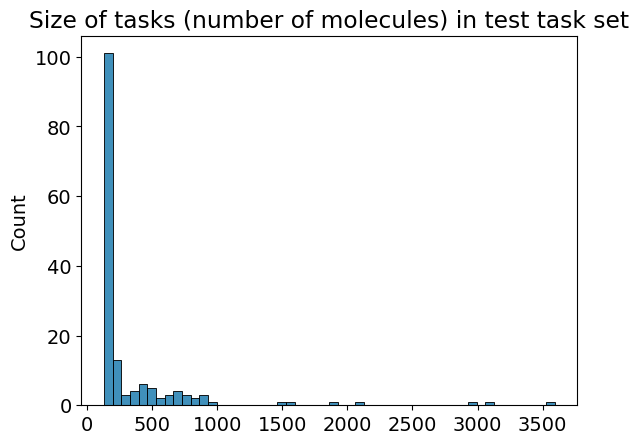

In [6]:
plt.figure()
sns.histplot(np.array(test_task_size))
plt.title('Size of tasks (number of molecules) in test task set') 
plt.show()

In [7]:
from rdkit import Chem,DataStructs
import numpy as np
from collections import defaultdict
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit
print(rdkit.__version__)

2022.03.2


In [22]:
mols = []
labels = []
smiles = []
for molecules in data_test[10]:
    smiles.append(molecules['SMILES'])
    mol = Chem.MolFromSmiles(molecules['SMILES'])
    mols.append(mol)
    labels.append(molecules['Property'])

In [23]:
import pandas as pd
df = pd.DataFrame({'SMILES':smiles, 'Property':labels})

In [24]:
import mols2grid
mols2grid.display(df, subset=["img", "Property"])

MolGridWidget()

In [10]:
labels

['1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',


In [55]:
rng = np.random.default_rng(0)
print(rng)
rfloat = rng.random()
print(rfloat)
rng.choice(np.arange(10), 5)

Generator(PCG64)
0.6369616873214543


array([5, 2, 3, 0, 0])

In [ ]:
sims_tasks: List[np.ndarray] = []
for task in data:
    sims = []
    for supp_mol in task_sample.train_samples:
        mol1 = Chem.MolFromSmiles(supp_mol.smiles)
        sim = []
        fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, 2048) 

        for query_mol in task_sample.test_samples:
            mol2 = Chem.MolFromSmiles(query_mol.smiles)
            fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, 2048)
            sim.append(DataStructs.TanimotoSimilarity(fp1,fp2))
        
        sims.append(sim)
    sims_tasks.append(np.array(sims))